# SREDJIVANJE PODATAKA

## Osnovne informacije o bazi 

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

In [2]:
carvana = pd.read_csv("Carvana/carvana.csv")

In [3]:
carvana.head(10)

,RefId,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,IsBadBuy
0,1,1/7/2009 0:12,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,AUTO,2.0,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389,0
1,2,1/7/2009 0:12,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,SILVER,AUTO,1.0,Alloy,65617,AMERICAN,COMPACT,CHRYSLER,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630,0
2,3,1/7/2009 0:12,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,MANUAL,2.0,Covers,69367,AMERICAN,COMPACT,FORD,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020,0
3,4,1/7/2009 0:12,ADESA,2004,5,MITSUBISHI,GALANT 4C,ES,4D SEDAN ES,WHITE,AUTO,2.0,Covers,81054,OTHER ASIAN,MEDIUM,OTHER,3901.0,4908.0,6706.0,8577.0,4709.0,5827.0,8149.0,9451.0,NaN,NaN,19638,33619,FL,5600.0,0,594,0
4,5,1/21/2009 0:12,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,AUTO,1.0,Alloy,76173,AMERICAN,LARGE TRUCK,CHRYSLER,6407.0,8051.0,10378.0,12443.0,7159.0,8934.0,11135.0,12560.0,NaN,NaN,19638,33619,FL,8800.0,0,920,0
5,6,1/25/2010 0:01,ADESA,2007,3,SUZUKI,FORENZA,NaN,4D SEDAN,GOLD,AUTO,2.0,Covers,35796,OTHER ASIAN,MEDIUM,OTHER,5019.0,5870.0,8484.0,9263.0,5451.0,6336.0,8617.0,9919.0,NaN,NaN,5546,33619,FL,5900.0,0,462,0
6,7,1/25/2010 0:01,ADESA,2006,4,SUZUKI,FORENZA,NaN,4D SEDAN,RED,AUTO,1.0,Alloy,72479,OTHER ASIAN,MEDIUM,OTHER,3620.0,4720.0,6484.0,8037.0,4439.0,5373.0,7460.0,9030.0,NaN,NaN,5546,33619,FL,4600.0,0,569,0
7,8,1/25/2010 0:01,ADESA,2005,5,DODGE,DURANGO 2WD V8,ST,4D SUV 4.7L ST,RED,AUTO,2.0,Covers,79957,AMERICAN,MEDIUM SUV,CHRYSLER,6242.0,8058.0,10261.0,12091.0,6698.0,7400.0,11325.0,11897.0,NaN,NaN,19619,33619,FL,7700.0,0,1389,0
8,9,1/1/2010 0:02,ADESA,2005,5,FORD,F150 PICKUP 2WD V8,Lar,CREW CAB 5.4L KING RANCH,GREY,AUTO,1.0,Alloy,86702,AMERICAN,LARGE TRUCK,FORD,12004.0,15664.0,17400.0,21702.0,11520.0,14974.0,16133.0,19975.0,NaN,NaN,19638,33619,FL,10100.0,0,853,0
9,10,1/1/2010 0:02,ADESA,2004,6,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 5.7L,PURPLE,AUTO,1.0,Alloy,74026,AMERICAN,LARGE TRUCK,CHRYSLER,6964.0,8498.0,10836.0,12389.0,8132.0,9370.0,11798.0,13307.0,NaN,NaN,19638,33619,FL,10200.0,0,920,0


Izbacimo PRIMEUNIT, AUCGUART, VNST, Auction zbog velikog broja n/a vrednosti:

In [4]:
carvana = carvana.drop(["PRIMEUNIT", "AUCGUART", "VNST", "Auction"], axis = 1)

Osnovne informacije o bazi:

In [5]:
carvana.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6798 entries, 0 to 6797
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              6798 non-null   int64  
 1   PurchDate                          6798 non-null   object 
 2   VehYear                            6798 non-null   int64  
 3   VehicleAge                         6798 non-null   int64  
 4   Make                               6798 non-null   object 
 5   Model                              6798 non-null   object 
 6   Trim                               6566 non-null   object 
 7   SubModel                           6798 non-null   object 
 8   Color                              6798 non-null   object 
 9   Transmission                       6798 non-null   object 
 10  WheelTypeID                        6515 non-null   float64
 11  WheelType                          6459 non-null   objec

Izvlacimo godinu iz PurchDate, kako bi sacuvali bar nesto od PurchDate, jer nam on u ovom formatu nista ne znaci:

In [6]:
carvana['PurchYear'] = pd.DatetimeIndex(carvana['PurchDate']).year
del carvana["PurchDate"]

Izbacujemo RefId jer je taj atribut jedinstven na nivou svake opservacije:

In [7]:
carvana = carvana.drop(["RefId"], axis = 1)

Proveravamo raspodelu po kategorijama za Transimission:

In [8]:
carvana['Transmission'].value_counts()

AUTO      6547
MANUAL     251
Name: Transmission, dtype: int64

WheeleTypeID i WheelType objasnjavaju jednu istu informaciju, te cemo ukloniti jednu. Biramo da to bude WheeleTypeID, jer ima odredjenih gresaka u podacima, koje kod WheelType ne postoje:

In [9]:
carvana = carvana.drop(["WheelTypeID"], axis = 1)

Proveravamo raspodelu po kategorijama kod Size:

In [10]:
carvana['Size'].value_counts()

MEDIUM         2888
LARGE           786
MEDIUM SUV      760
COMPACT         629
VAN             550
LARGE TRUCK     323
SMALL SUV       221
CROSSOVER       174
SPECIALTY       169
LARGE SUV       134
SMALL TRUCK      90
SPORTS           73
Name: Size, dtype: int64

Proveravamo raspodelu po kategorijama kod Size:

In [11]:
carvana['TopThreeAmericanName'].value_counts()

GM          2328
CHRYSLER    2164
OTHER       1158
FORD        1147
Name: TopThreeAmericanName, dtype: int64

Izbacujemo BYRNO:

Izbacujemo BYRNO jer je to broj koji se dodeljuje svakom individualnom kupcu, te je model izgradjen sa njim podlozan overfitu:

In [12]:
carvana = carvana.drop(["BYRNO"], axis = 1)


Proveravamo jedinstvene vrednosti VNZIP1:

In [13]:
carvana['VNZIP1'].value_counts()

32824    339
27542    319
75236    226
74135    214
80022    205
        ... 
48265      1
29323      1
43207      1
89139      1
30529      1
Name: VNZIP1, Length: 143, dtype: int64

Proveravamo raspodelu po kategorijama varijable IsOnlineSale (veliki disbalans klasa):

In [14]:
carvana['IsOnlineSale'].value_counts()

0    6614
1     184
Name: IsOnlineSale, dtype: int64

## Dopuna n/a vrednosti

N/A vrednosti kod kategorijskih varijabli cemo menjati modusom (kategorijom koja se u statistickom skupu najvise pojavljuje), a kod numerickih cemo N/A vrednosti menjati aritmetickom sredinom (ukoliko je raspodela obelezja na populaciji normalna) ili medianom (ukoliko raspodela obelezja na populaciji nije normalna). Kada je raspodela obelezja na populaciji normalna, aritmeticka sredina je dobar reprezent mere centralne tendencije i ima smisla N/A vrednosti zameniti njome. Ukoliko raspodela obelezja na populaciji nije normalna, mediana je reprezentativnija mera centralne tendencije, te je smisleno njome zameniti N/A vrednosti.

##### Kategorijske

Trazimo modus kod Trim i menjamo njim N/A vrednosti:

In [15]:
carvana['Trim'].value_counts() # Bas - modus
carvana.loc[carvana['Trim'].notnull() == False, "Trim"] = "Bas"

Trazimo modus kod WheelType i menjamo njim N/A vrednosti:

In [16]:
carvana['WheelType'].value_counts() # Alloy - modus
carvana.loc[carvana['WheelType'].notnull() == False, "WheelType"] = "Alloy"

Kako je za Nationality samo 1 N/A vrednost, zamenicemo je rucno i smisleno u odnosu na vrednosti ostalih atributa:

In [17]:
carvana.loc[carvana['Nationality'].notnull() == False, :].index 

Int64Index([6495], dtype='int64')

In [18]:
carvana.loc[carvana['Nationality'].notnull() == False, "Nationality"] = "AMERICAN"

Isto cemo uraditi i za TopThreeAmericanName:

In [19]:
carvana.loc[carvana['TopThreeAmericanName'].notnull() == False, :].index

Int64Index([6495], dtype='int64')

In [20]:
carvana['TopThreeAmericanName'].value_counts()

GM          2328
CHRYSLER    2164
OTHER       1158
FORD        1147
Name: TopThreeAmericanName, dtype: int64

In [21]:
carvana.loc[carvana['TopThreeAmericanName'].notnull() == False, "TopThreeAmericanName"] = "CHRYSLER"

Za Size cemo takodje pronaci modus i zameniti N/A vrednosti njime:

In [22]:
carvana['Size'].value_counts() # MEDIUM - modus

carvana.loc[carvana['Size'].notnull() == False, "Size"] = "MEDIUM"

##### Numericke (kontinualne)

Kako ne uzimaju normalnu raspodelu na populaciji, zamenicemo N/A vrednosti medianom:

In [23]:
carvana.loc[carvana['MMRAcquisitionAuctionAveragePrice'].notnull() == False, "MMRAcquisitionAuctionAveragePrice"] = carvana['MMRAcquisitionAuctionAveragePrice'].describe()['50%']
carvana.loc[carvana['MMRAcquisitionAuctionCleanPrice'].notnull() == False, "MMRAcquisitionAuctionCleanPrice"] = carvana['MMRAcquisitionAuctionCleanPrice'].describe()['50%']
carvana.loc[carvana['MMRAcquisitionRetailAveragePrice'].notnull() == False, "MMRAcquisitionRetailAveragePrice"] = carvana['MMRAcquisitionRetailAveragePrice'].describe()['50%']
carvana.loc[carvana['MMRAcquisitonRetailCleanPrice'].notnull() == False, "MMRAcquisitonRetailCleanPrice"] = carvana['MMRAcquisitonRetailCleanPrice'].describe()['50%']

In [24]:
carvana.loc[carvana['MMRCurrentAuctionAveragePrice'].notnull() == False, "MMRCurrentAuctionAveragePrice"] = carvana['MMRCurrentAuctionAveragePrice'].describe()['50%']
carvana.loc[carvana['MMRCurrentAuctionCleanPrice'].notnull() == False, "MMRCurrentAuctionCleanPrice"] = carvana['MMRCurrentAuctionCleanPrice'].describe()['50%']
carvana.loc[carvana['MMRCurrentRetailAveragePrice'].notnull() == False, "MMRCurrentRetailAveragePrice"] = carvana['MMRCurrentRetailAveragePrice'].describe()['50%']
carvana.loc[carvana['MMRCurrentRetailCleanPrice'].notnull() == False, "MMRCurrentRetailCleanPrice"] = carvana['MMRCurrentRetailCleanPrice'].describe()['50%']

Kako su sve celobrojne, nema potrebe da budu float, te cemo ih pretvoriti u int:

In [25]:
carvana['MMRAcquisitionAuctionAveragePrice'] = carvana['MMRAcquisitionAuctionAveragePrice'].astype(int)
carvana['MMRAcquisitionAuctionCleanPrice'] = carvana['MMRAcquisitionAuctionCleanPrice'].astype(int)
carvana['MMRAcquisitionRetailAveragePrice'] = carvana['MMRAcquisitionRetailAveragePrice'].astype(int)
carvana['MMRAcquisitonRetailCleanPrice'] = carvana['MMRAcquisitonRetailCleanPrice'].astype(int)
carvana['MMRCurrentAuctionAveragePrice'] = carvana['MMRCurrentAuctionAveragePrice'].astype(int)
carvana['MMRCurrentAuctionCleanPrice'] = carvana['MMRCurrentAuctionCleanPrice'].astype(int)
carvana['MMRCurrentRetailAveragePrice'] = carvana['MMRCurrentRetailAveragePrice'].astype(int)
carvana['MMRCurrentRetailCleanPrice'] = carvana['MMRCurrentRetailCleanPrice'].astype(int)

carvana['VehBCost'] = carvana['VehBCost'].astype(int)


In [26]:
out_csv = 'carvana_no_na.csv'
carvana.to_csv(out_csv)

## VIZUELIZACIJA

Iscrtajmo boxplotove za varijable koje predstavljaju cene, da uocimo ima outlier-a:

###### Acquisition

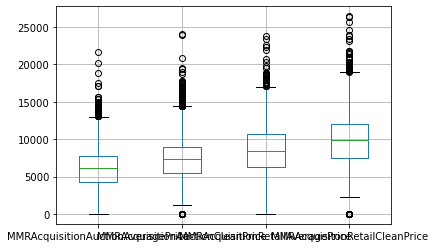

In [27]:
from matplotlib import pyplot as plt

boxplot1 = carvana.boxplot(column=['MMRAcquisitionAuctionAveragePrice','MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice'])

###### Current

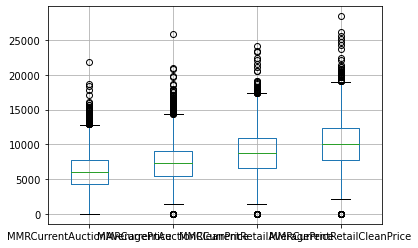

In [28]:
boxplot2 = carvana.boxplot(column=['MMRCurrentAuctionAveragePrice','MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice'])

Kreirajmo korelacionu matricu, kako bi uocili korelacije izmedju varijabli u datasetu:

<AxesSubplot:>

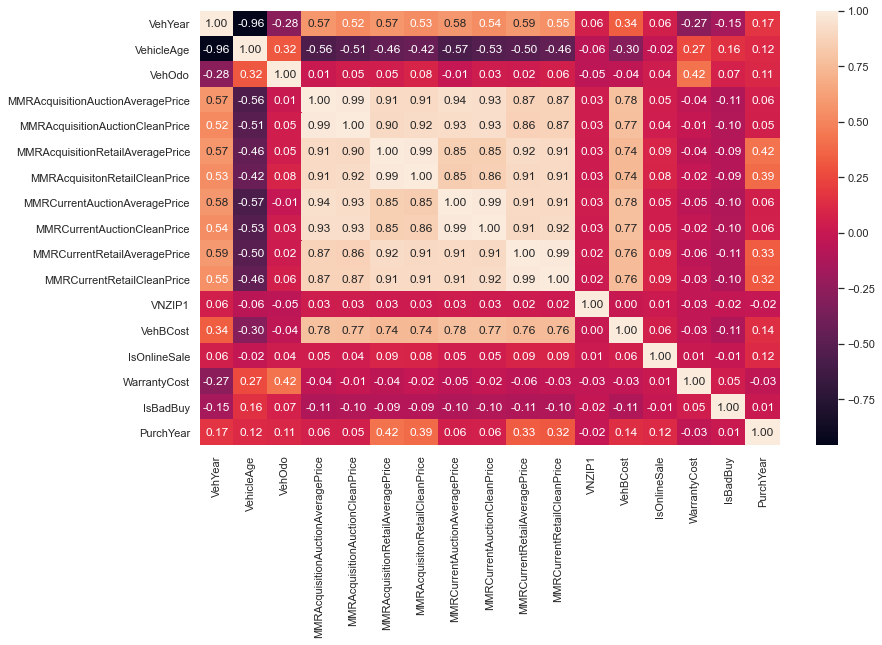

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

corr_matrix = carvana.select_dtypes(np.number).corr()
plt.figure(figsize=(13,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f')

Kako smo uocili velike korelacije izmedju varijabli koje se odnose na cene, odstampajmo scatter plotove izmedju njih:

###### scatterplotovi izmedju Acquisition i Current

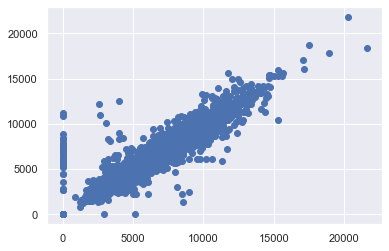

In [30]:

plt.scatter(carvana['MMRAcquisitionAuctionAveragePrice'], carvana['MMRCurrentAuctionAveragePrice'])

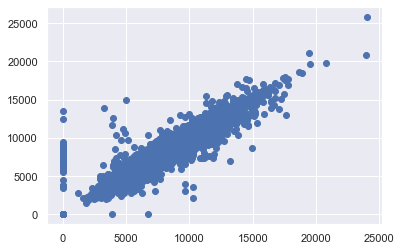

In [31]:
plt.scatter(carvana['MMRAcquisitionAuctionCleanPrice'], carvana['MMRCurrentAuctionCleanPrice'])

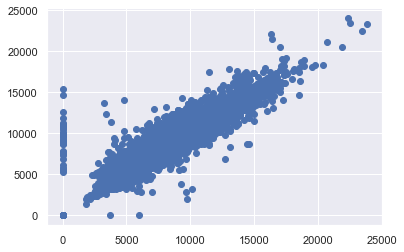

In [32]:
plt.scatter(carvana['MMRAcquisitionRetailAveragePrice'], carvana['MMRCurrentRetailAveragePrice'])

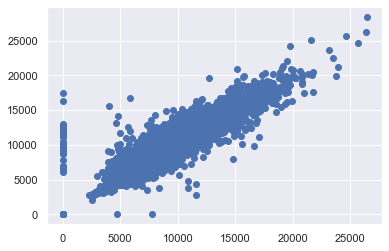

In [33]:
plt.scatter(carvana['MMRAcquisitonRetailCleanPrice'], carvana['MMRCurrentRetailCleanPrice'])

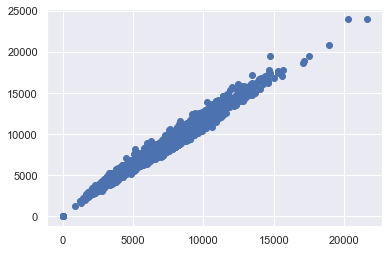

In [34]:
#scatterplotovi unutar Acquisition
plt.scatter(carvana['MMRAcquisitionAuctionAveragePrice'], carvana['MMRAcquisitionAuctionCleanPrice'])

###### scatterplotovi unutar Current

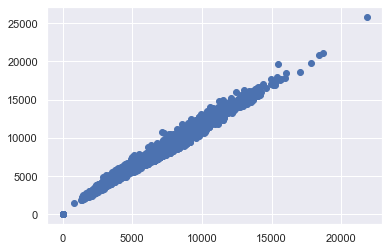

In [35]:
plt.scatter(carvana['MMRCurrentAuctionAveragePrice'], carvana['MMRCurrentAuctionCleanPrice'])

Odstampajmo distribuciju varijable MMRCurrentRetailAveragePrice u odnosu na izlaznu varijablu, kako bi videli da li se distribucija ove cene razlikuje u zavisnosti od toga da li je kupovina losa ili dobra:

C:\Users\Korisnik\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Korisnik\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Current Retail Avg. Price between Good and Bad Buys')

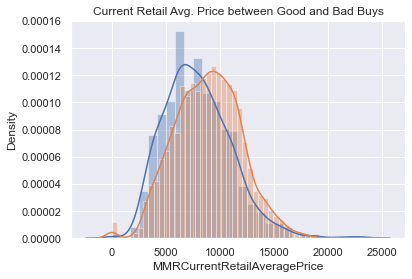

In [36]:
sns.distplot(carvana[carvana['IsBadBuy'] == 1]['MMRCurrentRetailAveragePrice'])
sns.distplot(carvana[carvana['IsBadBuy'] == 0]['MMRCurrentRetailAveragePrice'])
plt.title('Current Retail Avg. Price between Good and Bad Buys')

Preslozimo nas dataframe i postavimo IsBadBuy na mesto poslednje varijable:

In [37]:
IsBadBuy = carvana['IsBadBuy']
carvana2 = carvana.drop(['IsBadBuy'], axis = 1)
carvana2['IsBadBuy'] = IsBadBuy

In [38]:
carvana = carvana2

Izbacujemo ih zbog previse unique vrednosti, kreira se suvise mnogo varijabli prilikom dummy coding-a:

In [39]:
carvana = carvana.drop(['Model', 'SubModel', 'Trim'], axis = 1)

# KONSTRUKCIJA ATRIBUTA

Da bi smanjili suvise velike korelacije izmedju varijabli koje se odnose na cenu, kreiracemo racie, jer ukoliko iskoristimo sve ove varijable u originalnom obliku nece biti u redu, jer sve one objasnjavaju gotovo istu informaciju.

In [40]:
carvana['AcquisitionAuctionRatio'] = carvana['MMRAcquisitionAuctionAveragePrice'] / carvana['MMRAcquisitionAuctionCleanPrice']
carvana['AcquisitionRetailRatio'] = carvana['MMRAcquisitionRetailAveragePrice'] / carvana['MMRAcquisitonRetailCleanPrice']
carvana['CurrentAuctionRatio'] = carvana['MMRCurrentAuctionAveragePrice'] / carvana['MMRCurrentAuctionCleanPrice']
carvana['CurrentRetailRatio'] = carvana['MMRCurrentRetailAveragePrice'] / carvana['MMRCurrentRetailCleanPrice']

Izbacicemo varijable na osnovu kojih smo konstruisali ratio varijable:

In [41]:
carvana = carvana.drop(['MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
             'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 'MMRCurrentRetailAveragePrice', 
             'MMRCurrentRetailCleanPrice', 'MMRCurrentAuctionCleanPrice'], axis = 1)

Kako je ocigledno bilo deljenja nulom, vrednosti za neke ratio varijable ce biti nule, te je potrebno dopuniti te N/A vrednosti. N/A vrednosti cemo dopuniti medianom, jer ove varijable ne uzimaju normalnu raspodelu:

In [42]:
carvana.loc[carvana['AcquisitionAuctionRatio'].notnull() == False, "AcquisitionAuctionRatio"] = carvana['AcquisitionAuctionRatio'].describe()['50%']
carvana.loc[carvana['AcquisitionRetailRatio'].notnull() == False, "AcquisitionRetailRatio"] = carvana['AcquisitionRetailRatio'].describe()['50%']
carvana.loc[carvana['CurrentAuctionRatio'].notnull() == False, "CurrentAuctionRatio"] = carvana['CurrentAuctionRatio'].describe()['50%']
carvana.loc[carvana['CurrentRetailRatio'].notnull() == False, "CurrentRetailRatio"] = carvana['CurrentRetailRatio'].describe()['50%']

Odstampajmo ponovo matricu korelacije, da vidimo jesmo li uspeli da smanjimo te korelacije:

<AxesSubplot:>

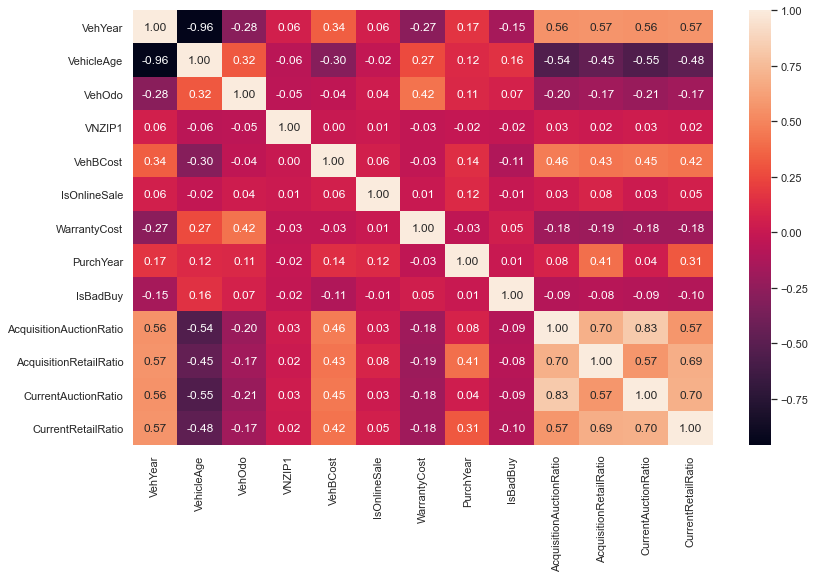

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

corr_matrix = carvana.select_dtypes(np.number).corr()
plt.figure(figsize=(13,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f')

## STANDARDIZACIJA NUMERICKIH I DUMMY CODING KATEGORIJSKIH VARIJABLI

Stavimo u X sve ulazne varijable, a u y izlaznu varijablu:

In [44]:
X = carvana.drop("IsBadBuy", axis = 1)
y = carvana['IsBadBuy']

Sredimo nase podatke pomocu ColumnTransforema-a. Pomocu StandarScaler-a cemo standardizovati sve numericke varijable (ne smemo da ih normalizujemo jer dosta varijabli ima outlier-e), a pomocu OneHotEncoder-a cemo nase kategorijske varijable pretvoriti u dummy varijable, jer nigde nismo nasli smislen poredak u okviru njih, da bi neku recodovali kao ordinalu.

In [45]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import StandardScaler

In [46]:
numerics = X.select_dtypes(np.number).columns
numeric_transformer = StandardScaler()

categorical = X.select_dtypes(object).columns
categorical_transformer = OneHotEncoder(sparse=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('numbers', numeric_transformer, numerics),
        ('categorical', categorical_transformer, categorical)
    ]
)

preprocessor.fit(X)

ColumnTransformer(transformers=[('numbers', StandardScaler(),
                                 Index(['VehYear', 'VehicleAge', 'VehOdo', 'VNZIP1', 'VehBCost', 'IsOnlineSale',
       'WarrantyCost', 'PurchYear', 'AcquisitionAuctionRatio',
       'AcquisitionRetailRatio', 'CurrentAuctionRatio', 'CurrentRetailRatio'],
      dtype='object')),
                                ('categorical', OneHotEncoder(sparse=False),
                                 Index(['Make', 'Color', 'Transmission', 'WheelType', 'Nationality', 'Size',
       'TopThreeAmericanName'],
      dtype='object'))])

In [47]:
[*numerics, *preprocessor.transformers_[1][1].get_feature_names(categorical)]

['VehYear',
 'VehicleAge',
 'VehOdo',
 'VNZIP1',
 'VehBCost',
 'IsOnlineSale',
 'WarrantyCost',
 'PurchYear',
 'AcquisitionAuctionRatio',
 'AcquisitionRetailRatio',
 'CurrentAuctionRatio',
 'CurrentRetailRatio',
 'Make_ACURA',
 'Make_BUICK',
 'Make_CADILLAC',
 'Make_CHEVROLET',
 'Make_CHRYSLER',
 'Make_DODGE',
 'Make_FORD',
 'Make_GMC',
 'Make_HONDA',
 'Make_HUMMER',
 'Make_HYUNDAI',
 'Make_INFINITI',
 'Make_ISUZU',
 'Make_JEEP',
 'Make_KIA',
 'Make_LEXUS',
 'Make_LINCOLN',
 'Make_MAZDA',
 'Make_MERCURY',
 'Make_MINI',
 'Make_MITSUBISHI',
 'Make_NISSAN',
 'Make_OLDSMOBILE',
 'Make_PLYMOUTH',
 'Make_PONTIAC',
 'Make_SATURN',
 'Make_SCION',
 'Make_SUBARU',
 'Make_SUZUKI',
 'Make_TOYOTA',
 'Make_VOLKSWAGEN',
 'Make_VOLVO',
 'Color_BEIGE',
 'Color_BLACK',
 'Color_BLUE',
 'Color_BROWN',
 'Color_GOLD',
 'Color_GREEN',
 'Color_GREY',
 'Color_MAROON',
 'Color_NOT AVAIL',
 'Color_ORANGE',
 'Color_OTHER',
 'Color_PURPLE',
 'Color_RED',
 'Color_SILVER',
 'Color_WHITE',
 'Color_YELLOW',
 'Transmis

In [48]:
X = pd.DataFrame(preprocessor.transform(X), 
             columns=[*numerics, *preprocessor.transformers_[1][1].get_feature_names(categorical)])


In [49]:
X.head()

,VehYear,VehicleAge,VehOdo,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost,PurchYear,AcquisitionAuctionRatio,AcquisitionRetailRatio,CurrentAuctionRatio,CurrentRetailRatio,Make_ACURA,Make_BUICK,Make_CADILLAC,Make_CHEVROLET,Make_CHRYSLER,Make_DODGE,Make_FORD,Make_GMC,Make_HONDA,Make_HUMMER,Make_HYUNDAI,Make_INFINITI,Make_ISUZU,Make_JEEP,Make_KIA,Make_LEXUS,Make_LINCOLN,Make_MAZDA,Make_MERCURY,Make_MINI,Make_MITSUBISHI,Make_NISSAN,Make_OLDSMOBILE,Make_PLYMOUTH,Make_PONTIAC,Make_SATURN,Make_SCION,Make_SUBARU,Make_SUZUKI,Make_TOYOTA,Make_VOLKSWAGEN,Make_VOLVO,Color_BEIGE,Color_BLACK,Color_BLUE,Color_BROWN,Color_GOLD,Color_GREEN,Color_GREY,Color_MAROON,Color_NOT AVAIL,Color_ORANGE,Color_OTHER,Color_PURPLE,Color_RED,Color_SILVER,Color_WHITE,Color_YELLOW,Transmission_AUTO,Transmission_MANUAL,WheelType_Alloy,WheelType_Covers,Nationality_AMERICAN,Nationality_OTHER,Nationality_OTHER ASIAN,Nationality_TOP LINE ASIAN,Size_COMPACT,Size_CROSSOVER,Size_LARGE,Size_LARGE SUV,Size_LARGE TRUCK,Size_MEDIUM,Size_MEDIUM SUV,Size_SMALL SUV,Size_SMALL TRUCK,Size_SPECIALTY,Size_SPORTS,Size_VAN,TopThreeAmericanName_CHRYSLER,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_OTHER
0,-0.191806,-0.106505,0.157568,-0.930981,-1.065435,-0.166793,0.194455,-1.031687,-2.244656,-0.629052,-1.410765,-0.681319,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.768751,0.475038,-0.401661,-0.930981,-1.523737,-0.166793,-1.075463,-1.031687,-1.707170,-0.674570,-1.864448,-1.236092,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.191806,-0.106505,-0.145604,-0.930981,-1.581025,-0.166793,-0.422936,-1.031687,-0.684055,0.650894,-1.184988,-0.080909,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.768751,0.475038,0.652406,-0.930981,-0.664420,-0.166793,-1.135696,-1.031687,-0.367682,-1.387553,-0.136808,0.122449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.768751,0.475038,0.319123,-0.930981,1.168791,-0.166793,-0.590250,-1.031687,-0.352668,-0.375692,-0.242636,0.598443,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Sacuvajmo sredjenu bazu:

In [50]:
final_data = X
final_data['IsBadBuy'] = y

out_csv = 'final_data.csv'
final_data.to_csv(out_csv)